In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("depression_data.csv")

In [16]:
df.head(4)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No


In [17]:
import toolkit

In [24]:
df = toolkit.pipeline(df)

In [25]:
df["Marital Status"].value_counts()

Marital Status
3    240444
2     72110
0     68485
1     32729
Name: count, dtype: int64

In [26]:
categorical_columns = [colname for colname in df.columns if df[colname].dtype in [np.int8, np.int64] if colname != "Chronic Medical Conditions"]

In [27]:
categorical_columns = np.array(categorical_columns)

In [28]:
all_combinations = [list(categorical_columns[[i, j]]) for i in range(len(categorical_columns)-1) for j in range(i+1, len(categorical_columns))]
all_combinations = [x for x in all_combinations if x[0] != x[1]]

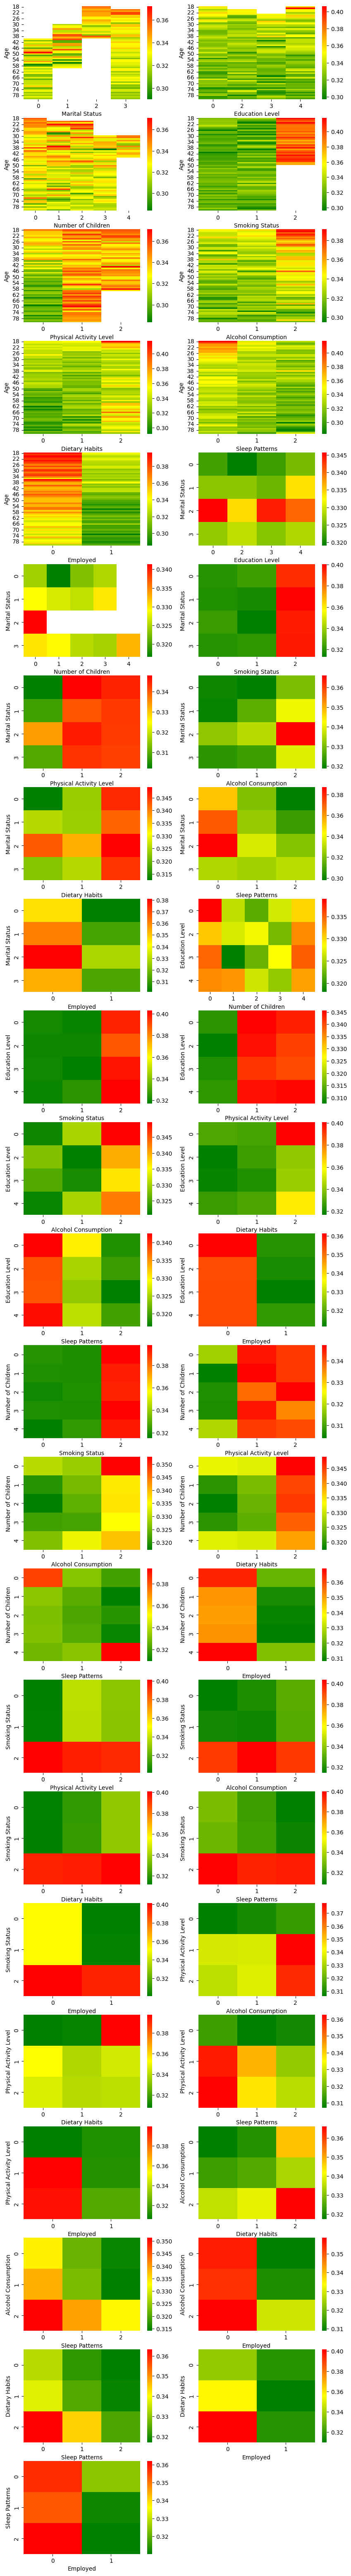

In [32]:
from matplotlib.colors import LinearSegmentedColormap
max_value = 0
min_value = 1
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["green", "yellow", "red"])
plt.figure(figsize=(10, 80))
for i in range(len(all_combinations)):
    plt.subplot(int(np.ceil(len(all_combinations)/2)), 2, i+1)
    combination = all_combinations[i]
    x = df.groupby(combination)["Chronic Medical Conditions"].mean().reset_index()
    df_wide = x.pivot(index=combination[0], columns=combination[1], values="Chronic Medical Conditions")
    sns.heatmap(df_wide, cmap=custom_cmap)#, vmin=0.25, vmax=0.45)
    #plt.title(f"{combination[0]}-{combination[1]}")
    plt.xlabel(combination[1])
    plt.ylabel(combination[0])
    
    maybe_max = np.max(df_wide.to_numpy())
    maybe_min = np.min(df_wide.to_numpy())

    if maybe_max > max_value: max_value = maybe_max
    if maybe_min < min_value: min_value = maybe_min

plt.savefig("heatmapy3.png")

In [9]:
categorical_columns = [colname for colname in df.columns if df[colname].dtype in [np.int8, np.int64]]
categorical_columns = np.array(categorical_columns)
all_combinations = [list(categorical_columns[[i, j]]) for i in range(len(categorical_columns)-1) for j in range(i+1, len(categorical_columns))]
all_combinations = [x for x in all_combinations if x[0] != x[1]]

In [15]:
df["count"] = 1

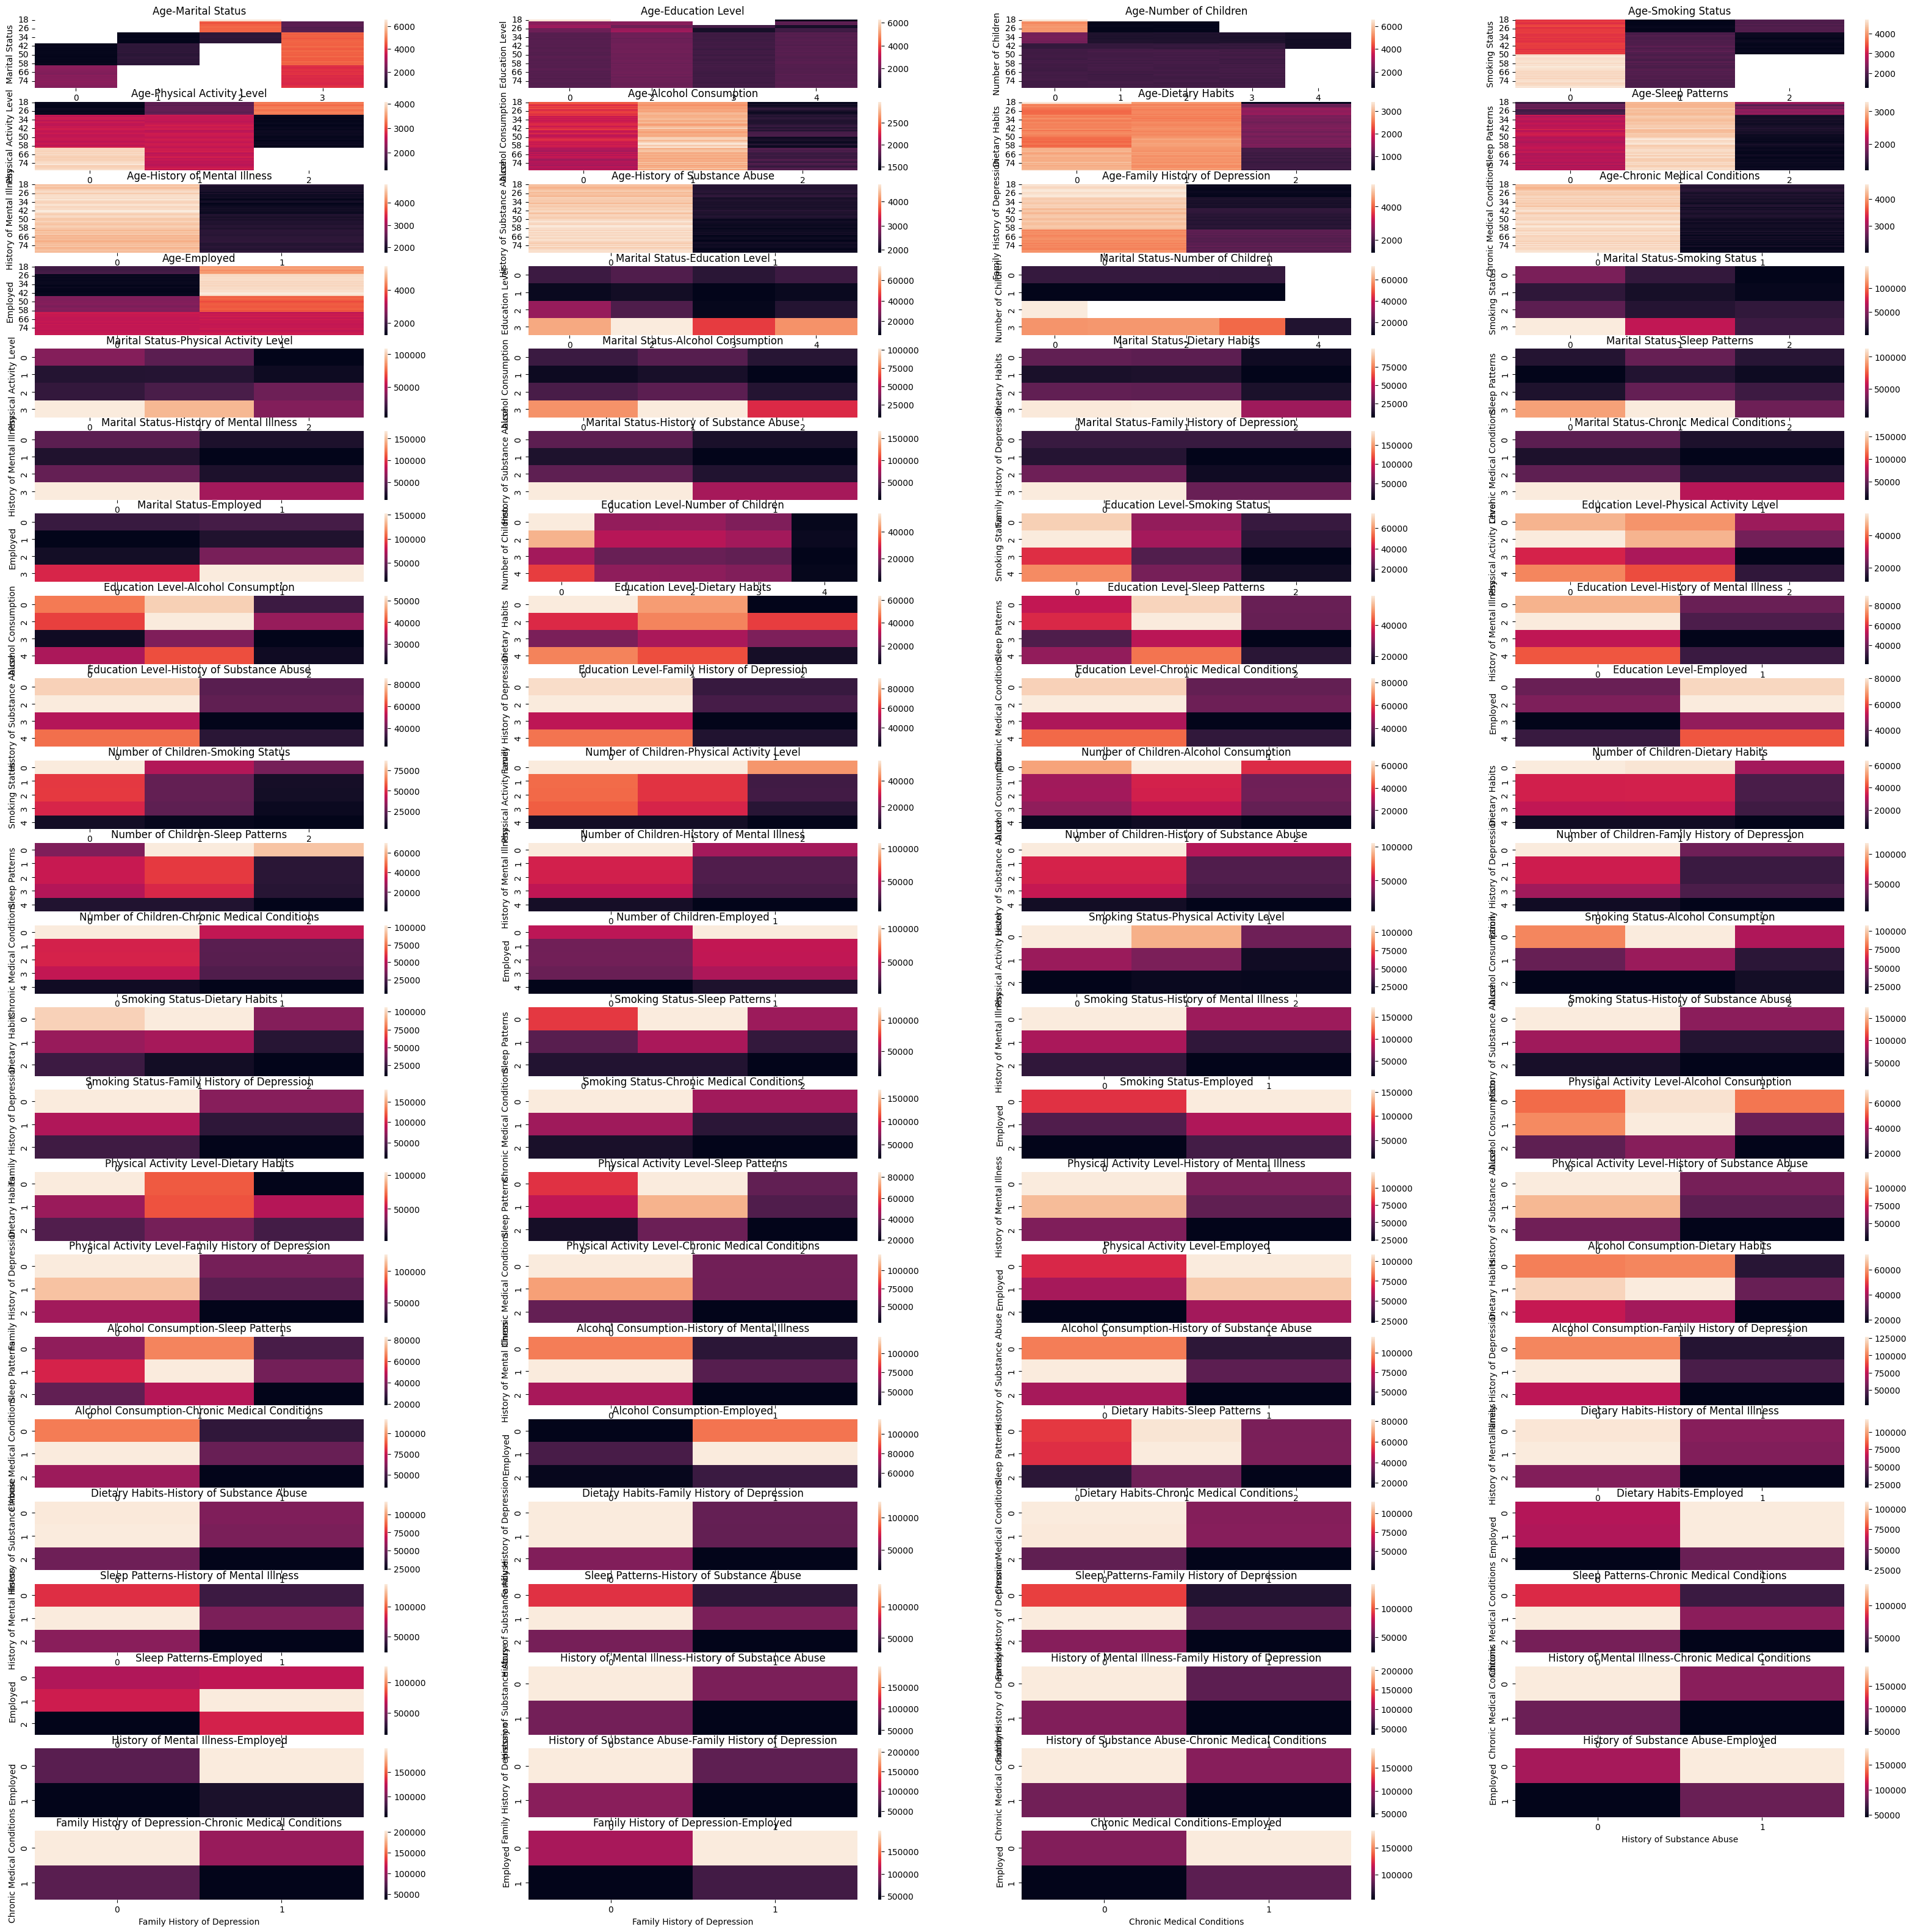

In [18]:
plt.figure(figsize=(40, 40))
for i in range(len(all_combinations)):
    plt.subplot(int(np.ceil(len(all_combinations)/4)), 4, i+1)
    combination = all_combinations[i]
    x = df.groupby(combination).count().reset_index()
    df_wide = x.pivot(index=combination[0], columns=combination[1], values="count")
    sns.heatmap(df_wide)
    plt.title(f"{combination[0]}-{combination[1]}")
    plt.xlabel(combination[0])
    plt.ylabel(combination[1])

plt.savefig("zliczenia.png")